<a href="https://colab.research.google.com/github/Cosamores/cdsi/blob/main/Classificacao_ArvoreDecisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pickle
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn import tree
from  sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix


In [26]:
drive.mount('/content/drive')
caminho = "/content/drive/MyDrive/IFSP/CDSI"



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open (f'{caminho}/risco_credito.csv', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

In [31]:
y_risco_credito

,risco
0,alto
1,alto
2,moderado
3,alto
4,baixo
5,baixo
6,alto
7,moderado
8,baixo
9,baixo


In [32]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)


DecisionTreeClassifier(criterion='entropy')

In [33]:
arvore_risco_credito.feature_importances_

array([0.20074124, 0.        , 0.21317518, 0.        , 0.06408636,
       0.        , 0.03885431, 0.1050944 , 0.        , 0.3780485 ])

In [34]:
arvore_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

In [ ]:
previsores = ['hustoria', 'divida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names=arvore_risco_credito.classes_, filled=True)

In [ ]:
# História -boa(0), divida - alta(0), garantia - nenhuma(1), renda - > 35(2)
# História - ruim (2), dívida - alta(0), garantia - adequada(0), renda - < 15(0)
previsao_risco_credito = arvore_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])

Base - Credit Data

In [ ]:
with open(f'{caminho}/credit.pkl', 'rb') as f:
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

In [ ]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)

In [ ]:
previsao_credit = arvore_credit.predict(X_credit_teste)
previsao_credit

In [ ]:
y_credit_teste

In [ ]:
accuracy_score(y_credit_teste, previsao_credit)

In [ ]:
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsao_credit))

In [ ]:
previsores_credit = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
tree.plot_tree(arvore_credit, feature_names=previsores_credit, class_names=['0','1'], filled=True)
fig.savefig('credit.png')

plt.show()


Base - Census

In [40]:
with open(f'{caminho}/census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [41]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [42]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(X_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [43]:
previsao_census = arvore_census.predict(X_census_teste)

In [44]:
accuracy_score(y_census_teste, previsao_census)

0.8104401228249745

0.8104401228249745

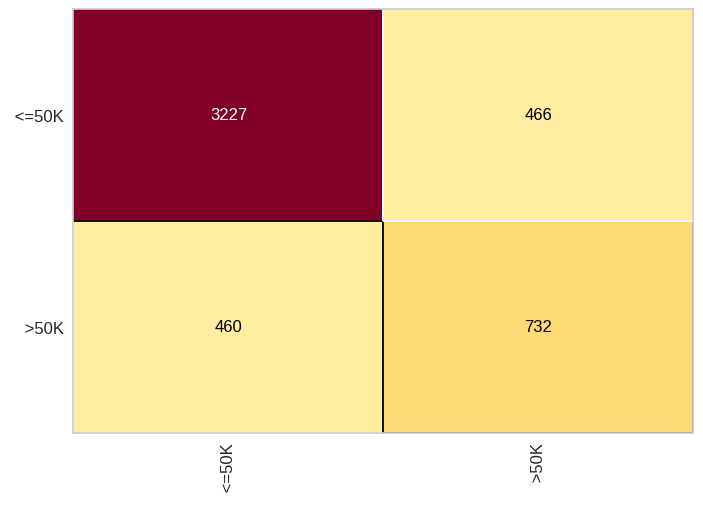

In [45]:
cm_census = ConfusionMatrix(arvore_census)
cm_census.fit(X_census_treinamento, y_census_treinamento)
cm_census.score(X_census_teste, y_census_teste)